In [74]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
df = pd.read_csv("data.csv")
df
# Predicted Stress

,Unnamed: 0,ID,Design,Direction,Displacement Rate,Stress,Strain
0,0,1,0,0,0.1,0.000006,0.000006
1,1,1,0,0,0.1,0.000035,0.000005
2,2,1,0,0,0.1,0.000465,0.000014
3,3,1,0,0,0.1,0.000192,0.000015
4,4,1,0,0,0.1,0.000379,0.000009
...,...,...,...,...,...,...,...
108737,108737,24,5,1,1.8,18.729373,1.054368
108738,108738,24,5,1,1.8,18.732007,1.054443
108739,108739,24,5,1,1.8,18.730772,1.054470
108740,108740,24,5,1,1.8,18.731807,1.054539


In [76]:
df.drop(columns=['Unnamed: 0'], axis=1)

,ID,Design,Direction,Displacement Rate,Stress,Strain
0,1,0,0,0.1,0.000006,0.000006
1,1,0,0,0.1,0.000035,0.000005
2,1,0,0,0.1,0.000465,0.000014
3,1,0,0,0.1,0.000192,0.000015
4,1,0,0,0.1,0.000379,0.000009
...,...,...,...,...,...,...
108737,24,5,1,1.8,18.729373,1.054368
108738,24,5,1,1.8,18.732007,1.054443
108739,24,5,1,1.8,18.730772,1.054470
108740,24,5,1,1.8,18.731807,1.054539


<Axes: >

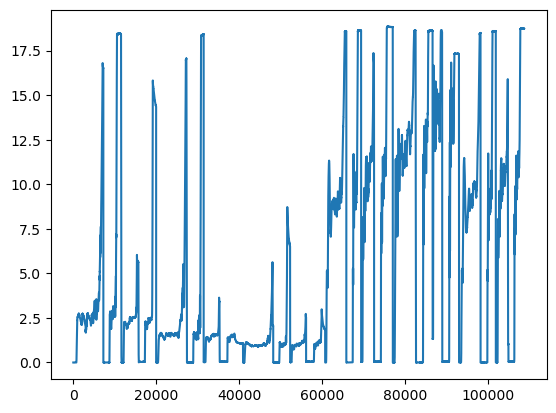

In [78]:
stress = df['Stress']
stress.plot()

In [80]:
def df_to_X_y(df, window_size ):  #5 in example
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)- window_size):
        row = [[a] for a in df_as_np[i: i + window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [82]:
WINDOW_SIZE = 10
X, y = df_to_X_y(stress, WINDOW_SIZE)
print(X.shape)
print(y.shape)

(108732, 10, 1)
(108732,)


In [88]:
#Column used to split data

((90000, 10, 1), (90000,), (9000, 10, 1), (9000,), (9732, 10, 1), (9732,))

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((5, 1)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cp = ModelCheckpoint('model.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [19]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 19.8580 - root_mean_squared_error: 4.2382 - val_loss: 0.1808 - val_root_mean_squared_error: 0.4252
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0406 - root_mean_squared_error: 0.1984 - val_loss: 0.1085 - val_root_mean_squared_error: 0.3294
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0314 - root_mean_squared_error: 0.1742 - val_loss: 0.0840 - val_root_mean_squared_error: 0.2898
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0297 - root_mean_squared_error: 0.1698 - val_loss: 0.0773 - val_root_mean_squared_error: 0.2781
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0250 - root_mean_squared_error: 0.1510 - val_loss: 0.0738 - val_root_mean_squared_error: 0.2717
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0175 - root_mean_squared_error: 0.1261 - val_loss: 0.0741 - val_root_mean_squared_error: 0.2722
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━

In [21]:
from tensorflow.keras.models import load_model
model = load_model('model.keras')

In [25]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


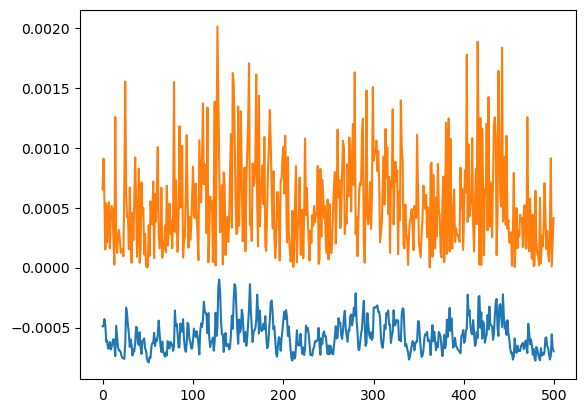

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:500])
plt.plot(train_results['Actuals'][:500])

In [31]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Val Predictions,Actuals
0,0.038247,0.037549
1,0.038030,0.038865
2,0.038580,0.036468
3,0.037686,0.039533
4,0.038687,0.036180
...,...,...
8995,-0.000272,0.001002
8996,-0.000285,0.001747
8997,-0.000115,0.000535
8998,-0.000314,0.000484


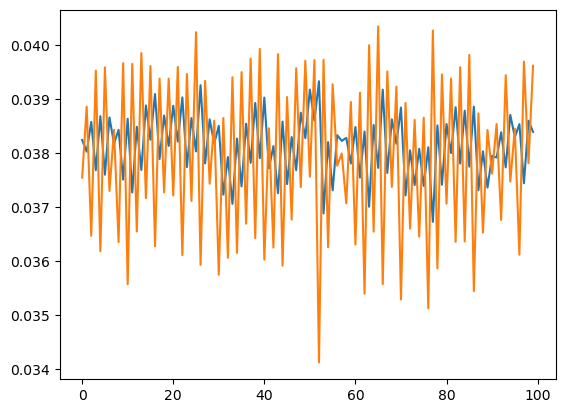

In [33]:
import matplotlib.pyplot as plt
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [35]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals': y_test})
test_results

305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Test Predictions,Actuals
0,-0.000377,0.000754
1,-0.000423,0.001157
2,-0.000350,0.001158
3,-0.000301,0.001301
4,-0.000236,0.000785
...,...,...
9727,18.720442,18.729373
9728,18.718676,18.732007
9729,18.719906,18.730772
9730,18.719435,18.731807


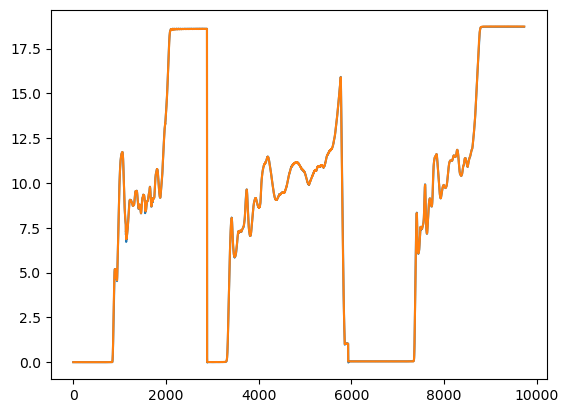

In [39]:
import matplotlib.pyplot as plt
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])